In [9]:
import pandas as pd
country = pd.read_excel('E:/NYU_DE_2020_Spring/final_country.xlsx')
country_name = country['location']
covid_data = country[['total_cases' , 'total_deaths' , 'total_cases_per_million','total_deaths_per_million']]

In [10]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out_pca = pca.fit_transform(country[[ 'total_cases' , 'total_deaths' ,'total_cases_per_million']])
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1', 'pca2'])
print(df_pca.head())
df_pca = pd.concat([df_pca, country_name], axis = 1)
print(df_pca.head())

           pca1         pca2
0 -13555.023373  -439.571330
1 -14951.376110  -306.830472
2 -11698.545986  -181.937391
3 -14943.644498  3053.788874
4 -15698.665764  -382.850447
           pca1         pca2     location
0 -13555.023373  -439.571330  Afghanistan
1 -14951.376110  -306.830472      Albania
2 -11698.545986  -181.937391      Algeria
3 -14943.644498  3053.788874      Andorra
4 -15698.665764  -382.850447       Angola


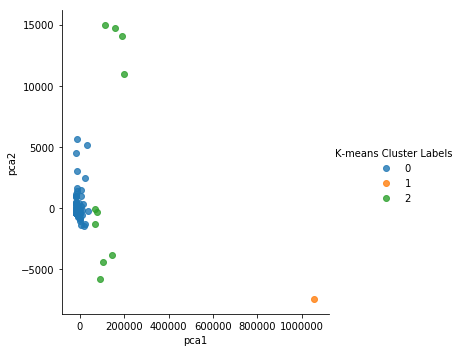

In [11]:
#kmean
from sklearn.cluster import KMeans
clus = KMeans(n_clusters = 3, tol=0.004, max_iter=300)
clus.fit(df_pca[['pca1','pca2']])

df_pca['K-means Cluster Labels'] = clus.labels_
sns.lmplot(x='pca1', y='pca2',     hue="K-means Cluster Labels", data=df_pca, fit_reg=False)

In [12]:
#result
location1 = df_pca[df_pca['K-means Cluster Labels'] == 1][['location']].to_numpy()
location2 = df_pca[df_pca['K-means Cluster Labels'] == 2][['location']].to_numpy()
location0 = df_pca[df_pca['K-means Cluster Labels'] == 0][['location']].to_numpy()

print('cluster 1:',location1)
print('cluster 2:',location2)
print('cluster 0:',location0)

cluster 1: [['United States']]
cluster 2: [['Brazil']
 ['China']
 ['France']
 ['Germany']
 ['Iran']
 ['Italy']
 ['Russia']
 ['Spain']
 ['Turkey']
 ['United Kingdom']]
cluster 0: [['Afghanistan']
 ['Albania']
 ['Algeria']
 ['Andorra']
 ['Angola']
 ['Anguilla']
 ['Antigua and Barbuda']
 ['Argentina']
 ['Armenia']
 ['Aruba']
 ['Australia']
 ['Austria']
 ['Azerbaijan']
 ['Bahamas']
 ['Bahrain']
 ['Bangladesh']
 ['Barbados']
 ['Belarus']
 ['Belgium']
 ['Belize']
 ['Benin']
 ['Bermuda']
 ['Bhutan']
 ['Bolivia']
 ['Bonaire Sint Eustatius and Saba']
 ['Bosnia and Herzegovina']
 ['Botswana']
 ['British Virgin Islands']
 ['Brunei']
 ['Bulgaria']
 ['Burkina Faso']
 ['Burundi']
 ['Cambodia']
 ['Cameroon']
 ['Canada']
 ['Cape Verde']
 ['Cayman Islands']
 ['Central African Republic']
 ['Chad']
 ['Chile']
 ['Colombia']
 ['Congo']
 ['Costa Rica']
 ["Cote d'Ivoire"]
 ['Croatia']
 ['Cuba']
 ['Curacao']
 ['Cyprus']
 ['Czech Republic']
 ['Democratic Republic of Congo']
 ['Denmark']
 ['Djibouti']
 ['Domini